In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib notebook

# 1) Définition de la fonction

In [2]:
def function(x, y):
    return math.pow((x/2), 2) + (x*y)/6 + 3*math.pow((y/3), 2) #Pour a=2, b=3

# 2) Algorithme de "Gradient Descent"

In [3]:
def gradient_descent(x, y, learning_rate, n_iterations): #x et y les coordonnées du point de départ pour l'algo
    #On veut garder en mémoire les positions du point à chaque itération, on utilise les listes
    x_values = [x]
    y_values = [y]
    z_values = [function(x, y)]
    #On répète le processus n_iterations fois
    for i in range (0, n_iterations):
        x_grad = x/2 + y/6 #Dérivée partielle de f par rapport à la variable x
        y_grad = (2*y)/3 + x/6 #Dérivée partielle de f par rapport à la variable y
        #Formules de l'algorithme
        x -= learning_rate * x_grad
        y -= learning_rate * y_grad
        #On enregistre les positions successives du point pour pouvoir tracer son cheminement
        x_values.append(x)
        y_values.append(y)
        z_values.append(function(x, y))
        
    return x_values, y_values, z_values #On retourne les 3 listes de positions x, y, z

In [4]:
#Exemple d'utilisation de la fonction
x_list, y_list, z_list = gradient_descent(x=-7.5, y=-7.5, learning_rate=0.01, n_iterations=1000)

# 3) Représentation graphique

In [5]:
#On créer un tableau numpy X contenant les coordonnées sur l'axe x: on va de -10 à 10
X = np.zeros((201, 201))
X[:,] = np.arange(-10, 10.1, 0.1) #On prend un pas de 0.1

In [6]:
#Pareil avec les coordonnées sur y: on a juste à transposer X
Y = np.transpose(X)

In [7]:
#On créer un tableau numpy Z contenant les images de (x, y) par f
Z = np.zeros((201,201))
for j in range(201):
    for i in range(201):
        x_pos = X[j, i]
        y_pos = Y[j, i]
        Z[j, i] = function(x_pos, y_pos)

<IPython.core.display.Javascript object>


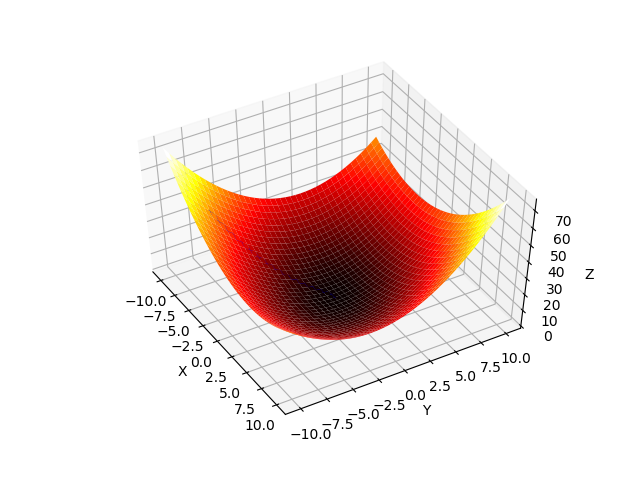

In [8]:
#Création du graphique 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot_surface(X, Y, Z, cmap=cm.hot, linewidth=0, antialiased=True, alpha=1) #On créer la surface délimitée par la fonction f
ax.plot(x_list, y_list, z_list, color='blue', linewidth=2) #On trace le cheminement de notre algorithme de Gradient Descent
plt.show()

In [9]:
#On affiche les coordonnées précises du minimum de la fonction f: le tuple formé du dernier élément de chaque liste x_list, y_list, z_list
minima = (round(x_list[-1],3), round(y_list[-1], 3), round(z_list[-1], 3))
print(minima)

(-0.041, 0.02, 0.0)
